# Lab5

Ознайомитися з методами регресійного аналізу, навчитися працювати з реальними і штучно створеними наборами даних для класифікації, застосовувати моделі для класифікації даних та аналізувати результати.

1. Створити набір даних за допомогою DatasetGenetator.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

noise = 6

data_array = {
    'X': np.arange(0, 1000, 15),
    'y': np.arange(0, 1000, 15)
}

gen_data = pd.DataFrame(data_array)

gen_data['X'] += np.random.normal(0, noise, size=gen_data['X'].shape)
gen_data['y'] += np.random.normal(0, noise, size=gen_data['y'].shape)

X_gen = gen_data[['X']]
y_gen = gen_data['y']

2. Завантажити набір даних для регресії з сайту Kaggle. Кожен студент має обрати унікальний набір даних.

In [15]:
import pandas as pd

# Завантажуємо навчальні та тестові дані (припускаємо, що файл для навчання вже завантажено)
file_path_train = 'mushrooms.csv'
kaggle_data_train = pd.read_csv(file_path_train)

# Видаляємо пропущені значення у навчальному наборі (якщо вони є)
kaggle_data_train = kaggle_data_train.dropna()

# Виведемо перші кілька рядків навчального набору для перегляду
print("Перші кілька рядків навчального набору:")
print(kaggle_data_train.head())

# Вибір ознак (X) та цільового стовпця (y)
# У даних "class" — це наш цільовий стовпець
X_kaggle_train = kaggle_data_train.drop(columns=['class'])  # Усі стовпці крім 'class'
y_kaggle_train = kaggle_data_train['class']                 # Цільовий стовпець 'class'

# Для прикладу створимо тестові дані, які можуть бути іншим файлом (або виділеною частиною цього ж набору)
# Вибираємо 30% даних для тестування
from sklearn.model_selection import train_test_split
X_kaggle_train, X_kaggle_test, y_kaggle_train, y_kaggle_test = train_test_split(X_kaggle_train, y_kaggle_train, test_size=0.3, random_state=42)

# Перевіримо розмірності для навчальних і тестових даних
print(f"Форма навчального набору ознак: {X_kaggle_train.shape}")
print(f"Форма тестового набору ознак: {X_kaggle_test.shape}")
print(f"Форма навчального набору класів: {y_kaggle_train.shape}")
print(f"Форма тестового набору класів: {y_kaggle_test.shape}")

Перші кілька рядків навчального набору:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                

3. Провести моделювання для отриманих наборів даних з використанням регресійного аналізу.

- для згенерованих даних

Середньоквадратична похибка (MSE): 65.57198646879219
Середня абсолютна похибка (MAE): 6.5357930951322825
Коефіцієнт детермінації (R^2): 0.9992231891421551


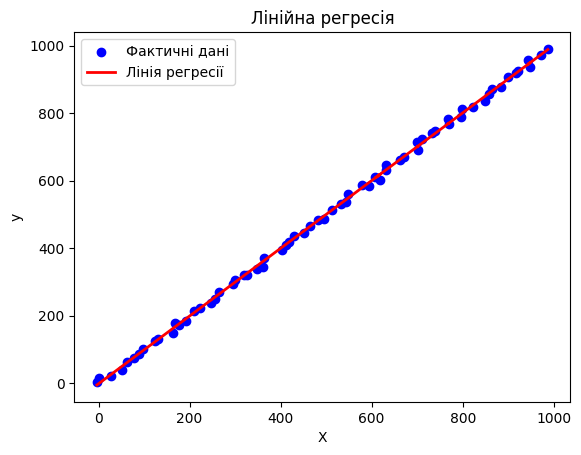

In [19]:
gen_data_model = LinearRegression()

gen_data_model.fit(X_gen, y_gen)
y_gen_pred = gen_data_model.predict(X_gen)

mse = mean_squared_error(y_gen, y_gen_pred)
mae = mean_absolute_error(y_gen, y_gen_pred)
r2 = r2_score(y_gen, y_gen_pred)

print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Середня абсолютна похибка (MAE): {mae}")
print(f"Коефіцієнт детермінації (R^2): {r2}")

plt.scatter(X_gen, y_gen, color='blue', label='Фактичні дані')
plt.plot(X_gen, y_gen_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія')
plt.legend()
plt.show()

-для даних з Kaggle

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# 1. Завантажуємо та обробляємо дані
file_path = 'mushrooms.csv'
df = pd.read_csv(file_path)

# Видаляємо пропущені значення
df = df.dropna()

# Використовуємо One-Hot-Encoding для кодування категоріальних змінних
df_encoded = pd.get_dummies(df)

# 2. Розділяємо дані на ознаки (X) та цільовий стовпець (y)
X = df_encoded.drop(columns=['class_p'])  # 'class_p' - один із варіантів класу (за допомогою get_dummies)
y = df_encoded['class_p']  # Цільовий стовпець (клас, чи є гриб їстівним)

# 3. Розподіляємо на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Створюємо модель класифікації на основі дерева рішень
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Передбачення на тестовій вибірці
y_pred = model.predict(X_test)

# 6. Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Виведення результатів
print(f"Точність моделі: {accuracy:.4f}")
print(f"Точність (Precision): {precision:.4f}")
print(f"Повнота (Recall): {recall:.4f}")
print(f"F1-скор: {f1:.4f}")

# Додатково виведемо повний звіт по моделі
print("\nЗвіт класифікації:\n", classification_report(y_test, y_pred))


Точність моделі: 1.0000
Точність (Precision): 1.0000
Повнота (Recall): 1.0000
F1-скор: 1.0000

Звіт класифікації:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1257
        True       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

